In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')


In [4]:
df = pd.read_csv(r"C:\Users\Abhiram_cheekala\Desktop\ML_Work\30days_challenge_01\diabetes.csv")
print(df)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6    148.0             72             35        0  33.6   
1              1     85.0             66             29        0   NaN   
2              8    183.0             64              0        0  23.3   
3              1     89.0             66             23       94  28.1   
4              0    137.0             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10    101.0             76             48      180  32.9   
764            2    122.0             70             27        0  36.8   
765            5    121.0             72             23      112  26.2   
766            1    126.0             60              0        0  30.1   
767            1     93.0             70             31        0  30.4   

     DiabetesPedigreeFunction   Age  Outcome  
0                       0.627  50.0        1  
1                

In [5]:
df.isnull().sum()

Pregnancies                 0
Glucose                     7
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         5
DiabetesPedigreeFunction    0
Age                         9
Outcome                     0
dtype: int64

In [8]:
## Filling the NUll Values with Mean
mean1=df['Glucose'].mean()
mean2=df['BMI'].mean()
mean3=df['Age'].mean()
df['Glucose'].fillna(value=mean1, inplace=True)
df['BMI'].fillna(value=mean2, inplace=True)
df['Age'].fillna(value=mean3, inplace=True)



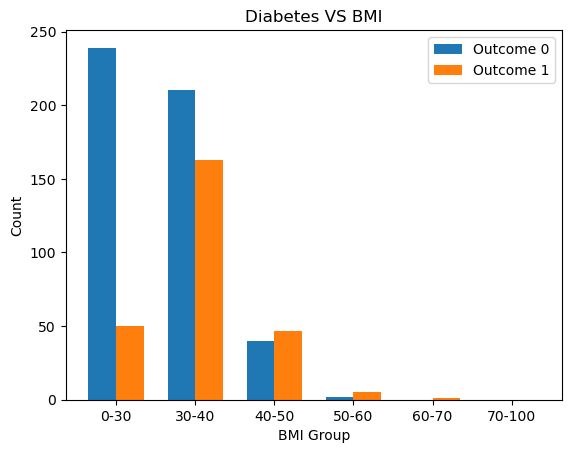

In [16]:

bmi = df['BMI'] 
outcomes = df['Outcome'] 

# Define the bmi bins
bmi_bins = [0, 30, 40, 50, 60, 70,100]

# Categorize bmi into bins
bmi_groups = np.digitize(bmi, bmi_bins, right=True)

# Count outcomes in each bmi group
counts_0 = [np.sum(outcomes[bmi_groups == i] == 0) for i in range(1, len(bmi_bins))]
counts_1 = [np.sum(outcomes[bmi_groups == i] == 1) for i in range(1, len(bmi_bins))]

# Define the labels for the x-axis
labels = [f'{bmi_bins[i-1]}-{bmi_bins[i]}' for i in range(1, len(bmi_bins))]

# Set up the bar positions
x = np.arange(len(labels))

# Create the bar plot
width = 0.35
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, counts_0, width, label='Outcome 0')
rects2 = ax.bar(x + width/2, counts_1, width, label='Outcome 1')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('BMI Group')
ax.set_ylabel('Count')
ax.set_title('Diabetes VS BMI')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Display the plot
plt.show()

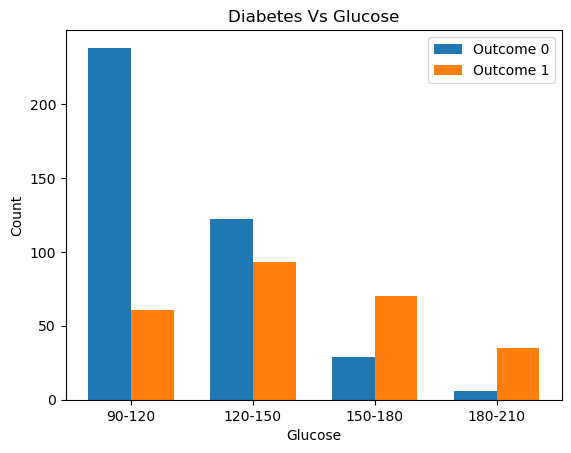

In [17]:
glucose = df['Glucose']  
outcomes = df['Outcome'] 

glucose_bins = [90, 120, 150, 180,210]


glucose_groups = np.digitize(glucose, glucose_bins, right=True)


counts_0 = [np.sum(outcomes[glucose_groups == i] == 0) for i in range(1, len(glucose_bins))]
counts_1 = [np.sum(outcomes[glucose_groups == i] == 1) for i in range(1, len(glucose_bins))]

# Define the labels for the x-axis
labels = [f'{glucose_bins[i-1]}-{glucose_bins[i]}' for i in range(1, len(glucose_bins))]

# Set up the bar positions
x = np.arange(len(labels))

# Create the bar plot
width = 0.35
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, counts_0, width, label='Outcome 0')
rects2 = ax.bar(x + width/2, counts_1, width, label='Outcome 1')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Glucose')
ax.set_ylabel('Count')
ax.set_title('Diabetes Vs Glucose')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Display the plot
plt.show()

In [20]:
knnclassification=KNeighborsClassifier(n_neighbors=3)
x_train, x_test, y_train, y_test = train_test_split(df[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']], df['Outcome'], test_size=0.3, random_state=0)

In [28]:
knnclassification.fit(x_train,y_train)
y_predict = knnclassification.predict(x_test)
print(y_predict)


[0 0 0 1 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1 1
 1 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 1 0
 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 1 1 1 1 0 0 1
 0 0 1 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1
 0 0 0 0 0 0]


In [22]:
accuracy = accuracy_score(y_test, y_predict)

print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 69.26%


In [23]:
from sklearn import svm

In [24]:
clf = svm.SVC(kernel='poly', C=1)
x_train, x_test, y_train, y_test = train_test_split(df[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']], df['Outcome'], test_size=0.3, random_state=0)
clf.fit(x_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")


Accuracy: 75.32%


In [29]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0)
x_train, x_test, y_train, y_test = train_test_split(df[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']], df['Outcome'], test_size=0.2, random_state=36)
clf.fit(x_train, y_train)
# Prediction
y_pred = clf.predict(x_test)
 
acc = accuracy_score(y_test, y_pred)
print("Logistic Regression model accuracy (in %):", acc*100)

Logistic Regression model accuracy (in %): 77.92207792207793
